In [173]:
import numpy as np
#from scipy.signal import gaussian
import matplotlib.pyplot as plt

In [181]:
def Pascals_triangle(n):
    ind = 1
    row = [0, 1, 0]
    while ind < n:
        row = [0] + [sum(row[i:i+2]) for i in range(len(row)-1)] + [0]
        ind += 1
    return row[1:-1]

def gaussian(x, x0, a, FWHM):
    sigma = FWHM/2.355
    return a * np.exp(-(x-x0)**2/(2*sigma**2))

def lorentzian(x, x0, a, FWHM):
    return a*0.5*FWHM/np.pi/((x-x0)**2 + (0.5*FWHM)**2)

def vline(x, ymin, ymax, npts=100):
    return [x, x], [ymin, ymax]
       

class Peak:
    def __init__(self, 
                 center_shift=1.5, 
                 integration=1):
        self.center_shift = center_shift
        self.integration = integration
        self.intensities = [[1]]
        self.subpeak_shifts = [[self.center_shift]]
        
        
    def split_peak(self, mult=2, J=7, spect_freq=500):
        J = J/spect_freq
        self.intensities.append([prev*new for prev in self.intensities[-1] for new in Pascals_triangle(mult)])
        #print(self.subpeak_shifts, self.subpeak_shifts[-1])
        if mult%2==0:
            self.subpeak_shifts.append([prev + J/2 + J*(mult-2)/2 - subpeak*J 
                                     for prev in self.subpeak_shifts[-1]
                                    for subpeak in range(mult)])
        else:
            self.subpeak_shifts.append([prev + J/2 + J*(mult-2)/2 - subpeak*J 
                                     for prev in self.subpeak_shifts[-1]
                                    for subpeak in range(mult)])

    def undo_split(self):
        self.intensities = self.intensities[:-1]
        self.subpeak_shifts = self.subpeak_shifts[:-1]

    def shift_center(self, delta=0):
        self.center_shift+=delta
        self.subpeak_shifts = [[subshift+delta for subshift in splitting] 
                               for splitting in self.subpeak_shifts]

    def get_peak(self):
        return self.intensities[-1], self.subpeak_shifts[-1]


class Spectrum:
    def __init__(peaks):
        self.peaks = list(peaks)

    def add_peak(peak = None, **kwargs):
        if peak:
            self.peaks.append(peak)
        else:
            self.peaks.append(Peak(**kwargs))

    def replace_peak(peak, ind):
        self.peaks[ind] = peak

    def remove_peak(ind):
        #len(self.peaks)>ind>=0
        assert 0<=ind<len(self.peaks), f"Index {ind} is out of the range [0, {len(self.peaks)})."
        self.peaks = self.peaks[:ind] + self.peaks[ind+1:]
        

class Plot(Spectrum):
    def __init__(self):
        pass
        
    def plot(self):
        pass
 

(5.1, 4.9)

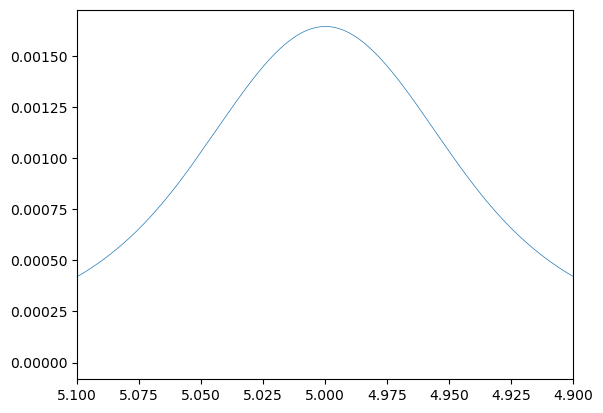

In [218]:
p = Peak(center_shift = 5, integration=3)
p.split_peak(2, 3) #multiplicity, J in Hz
p.split_peak(2, 7)
p.split_peak(3, 15)


ppm = np.linspace(0,10,100000)
intensities = np.zeros(100000)
inten, subshifts = p.get_peak()
lfit_peak = np.sum(np.array([lorentzian(ppm, subshifts[i], inten[i], 0.1)
                             for i in range(len(inten))]), axis=0)


plt.plot(ppm, lfit_peak/np.sum(lfit_peak)*p.integration, markersize=0.5, linewidth=0.5)


"""
linepeaks = [vline(subshifts[i], 0, inten[i]/max(gfit_peak)/10) for i in range(len(inten))]
for linepeak in linepeaks:
    plt.plot(*linepeak, markersize=0.5, linewidth=0.5)
"""


plt.xlim(5.1, 4.9)
#plt.ylim(0, 0.5)

TODO: 
1) add function to individually shift peaks. this will be useful for next layers of splitting: DONE
2) store each layer of splitting's shifts and intensities in addition to the peak. this will be useful for properly shifting and re scaling the peaks for each new layer of splittings. With this, after transforming all the shifts and intensities, the peaks can then be generated: DONE
3) Spectrum class that is a collection of peaks?: (started, untested) 
4) Plot class where plotting parameters are stored and handles the plot creation (fitting gaussian or lorentzian functions to intensity/shift/sigma) to each subpeak in a peak: (started, incomplete)
5) GUI?
